In [ ]:
#Assignment13.0

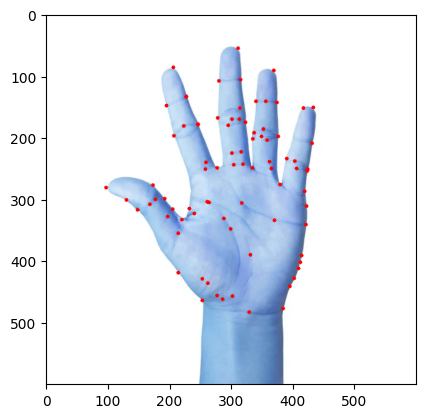

(<matplotlib.image.AxesImage at 0x1518db08790>, None)

In [17]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('C:/Users/78089/anaconda3/pics/hand.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray,100,0.01,10)
   
winSize = (15, 15)
zeroZone = (-1, -1)
criteria = (cv.TERM_CRITERIA_EPS + cv.TermCriteria_COUNT, 40, 0.001)
corners = cv.cornerSubPix(gray, corners, winSize, zeroZone, criteria)
    
#corners = np.int0(corners)
corners = np.intp(corners)
for i in corners:
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()


In [ ]:
#Assignment13.1

In [8]:
import cv2
import numpy as np

lk_params = dict(winSize=(15, 15),maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
color = np.random.randint(0, 255, (100, 3))

#cap = cv2.VideoCapture(0) #摄像头
cap = cv2.VideoCapture('C:/Users/78089/anaconda3/pics/run.avi')
ret, prev = cap.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(prev_gray,100,0.01,10)
mask = np.zeros_like(prev)

In [9]:
while True:
    ret, cur = cap.read()
    if not ret:
        break

    cur_gray = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
    new_corners, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, cur_gray, corners, None, **lk_params)
    good_new = new_corners[st == 1]
    good_old = corners[st == 1]
    
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        cur  = cv2.circle(cur, (int(a), int(b)), 2, color[i].tolist(), -1)
    
    img = cv2.add(cur, mask)
    cv2.imshow("frame", img)
    k = cv2.waitKey(300) & 0xFF #cv2.waitKey(25)
    if k == 27:
        break
    
    prev_gray = cur_gray.copy()
    corners = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()
cap.release()

In [ ]:
#Assignment13.2

In [16]:
import cv2
import numpy as np

lk_params = dict(winSize=(15, 15),maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
color = np.random.randint(0, 255, (100, 3))

#cap = cv2.VideoCapture(0) #摄像头
cap = cv2.VideoCapture('C:/Users/78089/anaconda3/pics/run.avi')
ret, prev = cap.read()
prev_gray = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)

#在L12课件17页可以找到code
fgbg = cv2.createBackgroundSubtractorMOG2()
fgmask = fgbg.apply(prev)
n = 0
while(n<5):
    ret,prev = cap.read()
    fgmask = fgbg.apply(prev)
    n = n+1

corners = cv2.goodFeaturesToTrack(prev_gray,100,0.01,10, mask =fgmask)
mask = np.zeros_like(prev)

while True:
    ret, cur = cap.read()
    if not ret:
        break

    cur_gray = cv2.cvtColor(cur, cv2.COLOR_BGR2GRAY)
    new_corners, st, err = cv2.calcOpticalFlowPyrLK(prev_gray, cur_gray, corners, None, **lk_params)
    good_new = new_corners[st == 1]
    good_old = corners[st == 1]
    
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        cur  = cv2.circle(cur, (int(a), int(b)), 2, color[i].tolist(), -1)
    
    img = cv2.add(cur, mask)
    cv2.imshow("frame", img)
    k = cv2.waitKey(300) & 0xFF #cv2.waitKey(25)
    if k == 27:
        break
    
    prev_gray = cur_gray.copy()
    corners = good_new.reshape(-1, 1, 2)

cv2.destroyAllWindows()
cap.release()